# Лабораторна робота 2. OpenCV. Геометричні перетворення зображення

__Мета:__ знайомство з методами геометричних перетворень бібліотеки OpenCV у середовищі Anaconda із застосуванням Jupyter Notebook засобами мови програмування Python.

# Хід роботи

1.Імпортувати RGB-зображення Image з диску. Оцінити його розмір у пікселях та об’єм пам’яті, який він займає на диску.

Image size: 627x628 pixels, 3 channels
File size on disk: 1181268 bytes


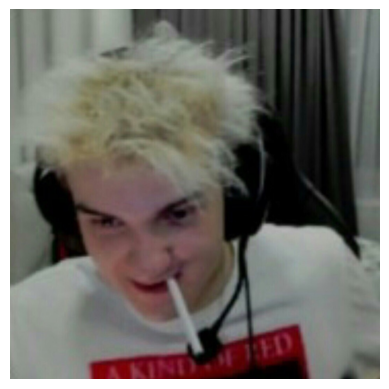

In [28]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image_path = 'img/image5.png'
image = cv.imread(image_path)
height, width, channels = image.shape
file_size = np.prod(image.shape)
print(f'Image size: {width}x{height} pixels, {channels} channels')
print(f'File size on disk: {file_size} bytes')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


2.Імпортувати RGB-зображення Image у напівтоновому форматі. Оцінити його розмір у пікселях та об’єм пам’яті, який він займає на диску. Порівняти результати з попередніми результатами. Пояснити результати.

Image size in pixels: 627x628
Memory size on disk in bytes: 393756 bytes


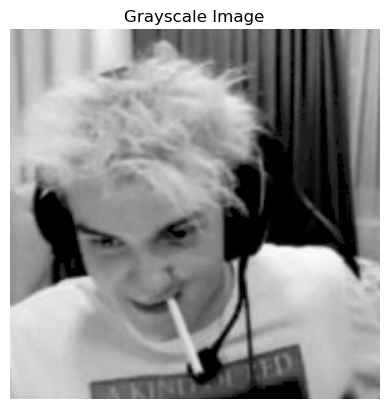

In [29]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale
image = cv.imread('img/image5.png', cv.IMREAD_GRAYSCALE)

# Get the dimensions of the image
height, width = image.shape

# Calculate the size of the image in bytes
image_size_bytes = image.nbytes

# Print information about the image
print(f'Image size in pixels: {width}x{height}')
print(f'Memory size on disk in bytes: {image_size_bytes} bytes')

# Display the grayscale image using matplotlib
plt.imshow(image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')  # Turn off axis labels and ticks
plt.show()



Напівтонове зображення використовує лише один канал для вираження яскравості пікселя, тоді як RGB зображення має три окремих канали для червоного, зеленого і синього кольорів , тому у RGB зображення буде більший розмір чим у напівтоновому.

3.Зменшити початкове RGB-зображення Image у разів, візуалізувати його, перевіривши результат масштабування, та експортувати його на диск. Чи змінився об’єм пам’яті, який він займає на диску? Обгрунтувати отриманий результат.

Original image size: 627x628 pixels
Memory size on disk in bytes: 1181268 bytes


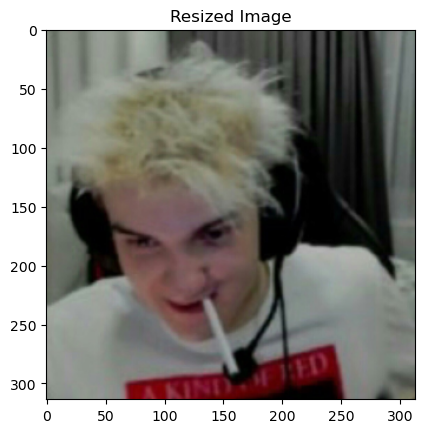

Resized image size: 313x314 pixels
File size on disk of the resized image: 23867 bytes


In [34]:
import cv2
import math
import matplotlib.pyplot as plt
import os

image = cv2.imread('img/image5.png')
print(f'Original image size: {image.shape[1]}x{image.shape[0]} pixels')
print(f'Memory size on disk in bytes: {image.size} bytes')
rows, cols = image.shape[:2]
new_rows = math.floor(rows / 2)
new_cols = math.floor(cols / 2)
image_resize = cv2.resize(image, (new_cols, new_rows), interpolation=cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(image_resize, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')
plt.show()
output_path = 'img/image5.png.jpg'
cv2.imwrite(output_path, image_resize)
print(f'Resized image size: {new_cols}x{new_rows} pixels')
file_size = os.path.getsize(output_path)
print(f'File size on disk of the resized image: {file_size} bytes')

Об'єм пам'яті, який займає зображення на диску, залежить від кількості пікселів та рівня стиснення при збереженні. У цьому випадку розмір зображення зменшився на половину, що вплинуло на об'єм файлу.

4.Написати функцію, яка буде виконувати пропорційне зменшення початкового зображення розміром пікселей відповідно до вимоги, щоби зменешене зображення мало ширину пікселей.

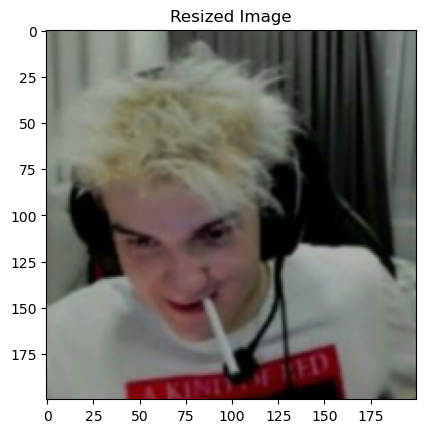

Resized image size: 200x200 pixels
File size on disk of the resized image: 68334 bytes


In [33]:
import cv2
import matplotlib.pyplot as plt
import os

def resize_and_save_image(input_path, output_path, target_width):
    image = cv2.imread(input_path)
    height, width, channels = image.shape
    new_height = int(height * (target_width / width))
    resized_image = cv2.resize(image, (target_width, new_height), interpolation=cv2.INTER_AREA)
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.title('Resized Image')
    plt.show()
    cv2.imwrite(output_path, resized_image)
    print(f"Resized image size: {target_width}x{new_height} pixels")
    file_size = os.path.getsize(output_path)
    print(f"File size on disk of the resized image: {file_size} bytes")
input_image_path = 'img/image5.png'
output_image_path = 'img/image6.png'
target_width = 200

resize_and_save_image(input_image_path, output_image_path, target_width)



5.Взяти фото з перспективним викривленням на фоні стіни. Вирізати зону стіни та виконати афінні та перспективні перетворення за трьома точками точками і візуалізовані. В кожному випадку результати мають бути записані на диск.

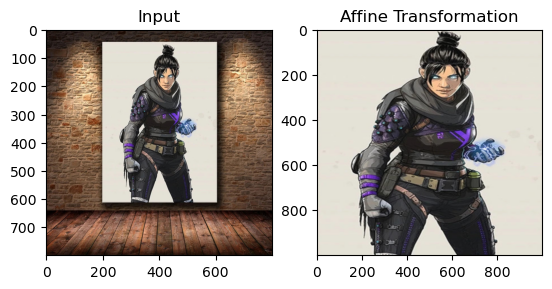

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
image = cv.imread('img/fr21.jpg')
if image is None:
    print("Error: Unable to load the image.")
else:
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.subplot(121)
    plt.imshow(image_rgb)
    plt.title('Input')
    
    points_input = np.float32(
        [
            [200, 50],        
            [600, 50],     
            [600, 600]  
        ]
    )
    output_width = 1000
    output_height = 1000
    points_output = np.float32(
        [
            [0, 0],                  
            [output_width, 0],       
            [output_width, output_height]      
        ]
    )

    M_affine_trans = cv.getAffineTransform(points_input, points_output)
    image_affine_trans = cv.warpAffine(image, M_affine_trans, (output_width, output_height))
    image_affine_trans_rgb = cv.cvtColor(image_affine_trans, cv.COLOR_BGR2RGB)
    plt.subplot(122)
    plt.imshow(image_affine_trans_rgb)
    plt.title('Affine Transformation')
    cv.imwrite('img/123.jpg', image_affine_trans)
    plt.show()



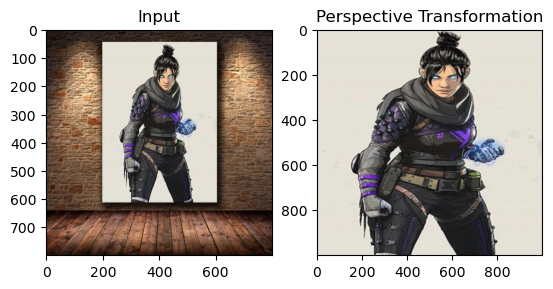

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('img/fr21.jpg')

if image is None:
    print("Error: Unable to load the image.")
else:
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.subplot(121)
    plt.imshow(image_rgb)
    plt.title('Input')
    
    points_input = np.float32(
        [
            [200, 50],        
            [600, 50],     
            [600, 600],  
            [200, 600]   
        ]
    )
    
    output_width = 1000
    output_height = 1000

    points_output = np.float32(
        [
            [0, 0],                  
            [output_width, 0],       
            [output_width, output_height],  
            [0, output_height]        
        ]
    )

    M_perspective_trans = cv.getPerspectiveTransform(points_input, points_output)
    image_perspective_trans = cv.warpPerspective(image, M_perspective_trans, (output_width, output_height))
    image_perspective_trans_rgb = cv.cvtColor(image_perspective_trans, cv.COLOR_BGR2RGB)
    plt.subplot(122)
    plt.imshow(image_perspective_trans_rgb)
    plt.title('Perspective Transformation')
    cv.imwrite('img/123.jpg', image_perspective_trans)
    plt.show()



## Контрольні запитання

1.У чому полягає сенс афінних перетворень?

Афінні перетворення в геометрії є класом перетворень, які зберігають прямі лінії та паралельність. Суть афінних перетворень полягає в тому, що вони виконують лінійне відображення точок, зберігаючи паралельність та відстані між точками.

2.Чи є оперції трансляції, масштабування і повороту афінними? Відповідь обгрунтувати.

Так, операції трансляції, масштабування та повороту є афінними перетвореннями в геометричному просторі. Під час трансляції об'єкти зсуваються паралельно до вісей координат, при цьому паралельність ліній і відстань між точками залишаються незмінними. Масштабування змінює розмір об'єктів, але також зберігає паралельність ліній. Поворот об'єктів навколо точки або вісі також відповідає визначенню афінних перетворень, оскільки зберігає паралельність та відстань між точками. Такі афінні перетворення широко використовуються в комп'ютерному зорі та обробці зображень для реалізації різноманітних операцій над зображеннями.

3.Чи є перспективні перетворення частинним випадком афінних перетворень? Відповідь обгрунтувати.

Перспективні перетворення і афінні перетворення є двома різними класами геометричних перетворень в двовимірному просторі. Основна відмінність полягає в тому, як вони впливають на паралельність ліній та відношення відстаней між точками.У випадку афінних перетворень, які включають в себе трансляцію, масштабування та поворот, паралельні лінії залишаються паралельними після перетворення, і відношення відстаней між точками залишаються незмінними. Це дозволяє зберігати геометричну форму об'єкта. Перспективні перетворення, з іншого боку, не зберігають паралельність ліній та відношення відстаней між точками. Це дозволяє їм моделювати ефекти перспективи, такі як зближеність об'єктів на далекому плані, що знаходяться на однаковій відстані від спостерігача.

## References

1.https://github.com/MykolaLucky/Mykola - посилання на GitHub-репозиторій